In [12]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Step 2: Load the CSV file into a DataFrame
file_path = 'Degrees_Awarded_to_Post-Secondary_Graduates_in_Colorado_20241017.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
df.head(10)

,year,institutionName,institutionLevelId,institutionLevel,institutionType,taxType,coBased,division,ageDesc,ageMin,...,gender,ethnicity,studentLevel,degreeLevel,residencyId,residency,cip2,cip,programName,recordCount
0,2001,Aims Community College,2.0,College,Public,Not-for-Profit,Yes,DHE,Under 17,NaN,...,Female,"White, non-Hispanic",Undergraduate,Certificate,1,In-State,51.0,51.1614,NaN,NaN
1,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,Unknown,Undergraduate,Bachelor,1,In-State,31.0,31.0301,"Parks, Recreation and Leisure Facilities Manag...",NaN
2,2001,Aims Community College,2.0,College,Public,Not-for-Profit,Yes,DHE,17-20,17.0,...,Female,Hispanic,Undergraduate,Certificate,1,In-State,20.0,20.0201,NaN,NaN
3,2001,Aims Community College,2.0,College,Public,Not-for-Profit,Yes,DHE,17-20,17.0,...,Female,Hispanic,Undergraduate,Certificate,1,In-State,51.0,51.1614,NaN,NaN
4,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,Unknown,Undergraduate,Bachelor,1,In-State,31.0,31.0301,"Parks, Recreation and Leisure Facilities Manag...",NaN
5,2001,Aims Community College,2.0,College,Public,Not-for-Profit,Yes,DHE,17-20,17.0,...,Female,Unknown Ethnicity,Undergraduate,Certificate,1,In-State,51.0,51.1614,NaN,NaN
6,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,Native American or Alaskan Native,Undergraduate,Bachelor,1,In-State,26.0,26.0101,"Biology/Biological Sciences, General",NaN
7,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,Native American or Alaskan Native,Undergraduate,Bachelor,1,In-State,26.0,26.0101,"Biology/Biological Sciences, General",NaN
8,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,Native American or Alaskan Native,Undergraduate,Bachelor,1,In-State,26.0,26.0101,"Biology/Biological Sciences, General",NaN
9,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,Hispanic,Graduate,Masters,1,In-State,13.0,13.0401,"Educational Leadership and Administration, Gen...",NaN


In [14]:
# Step 3: Data Preparation
# Convert 'year' to numeric, handling errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Drop rows with missing values in 'year' or 'institutionName'
df_filtered = df.dropna(subset=['year', 'institutionName'])

In [15]:
# Step 4: Aggregating the data by year and institution
df_grouped = df_filtered.groupby(['year', 'institutionName']).agg({
    'studentLevel': 'count',
    'degreeLevel': 'count',
    'residency': 'count',
    'programName': 'count'
}).reset_index()

# Rename the columns for clarity
df_grouped.columns = ['year', 'institutionName', 'studentLevel_count', 'degreeLevel_count', 'residency_count', 'programName_count']

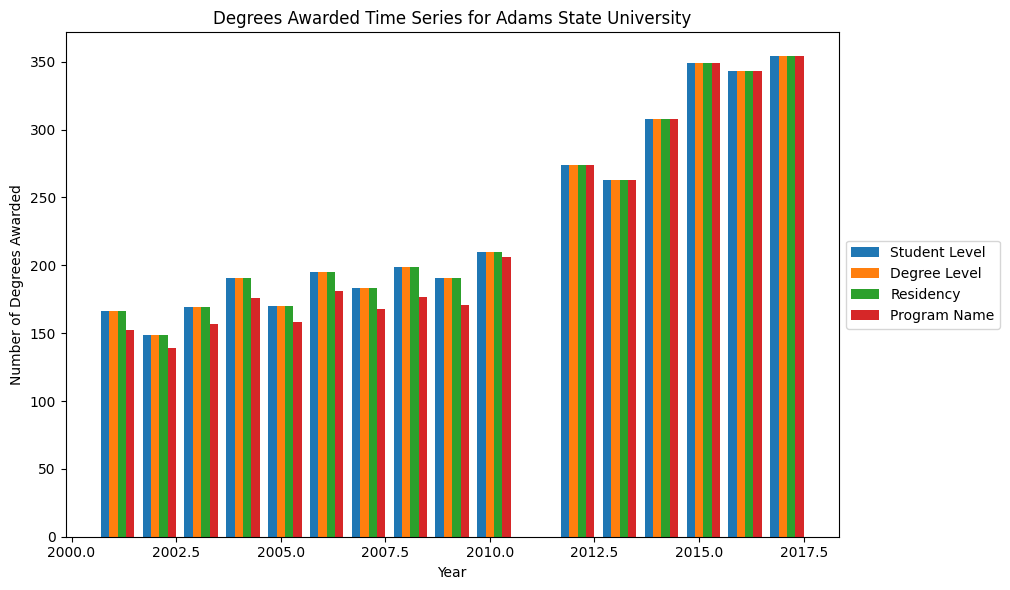

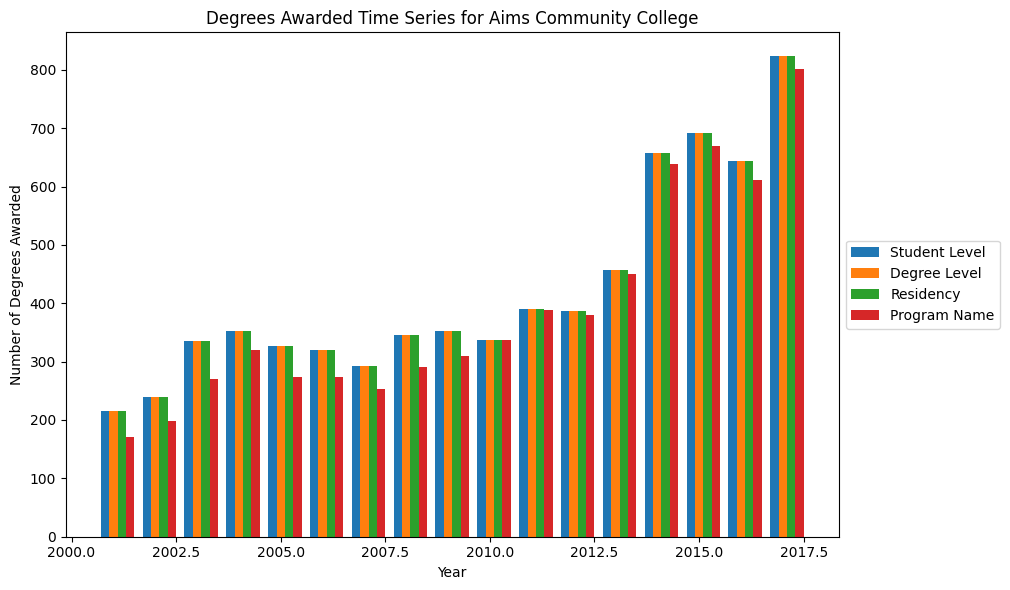

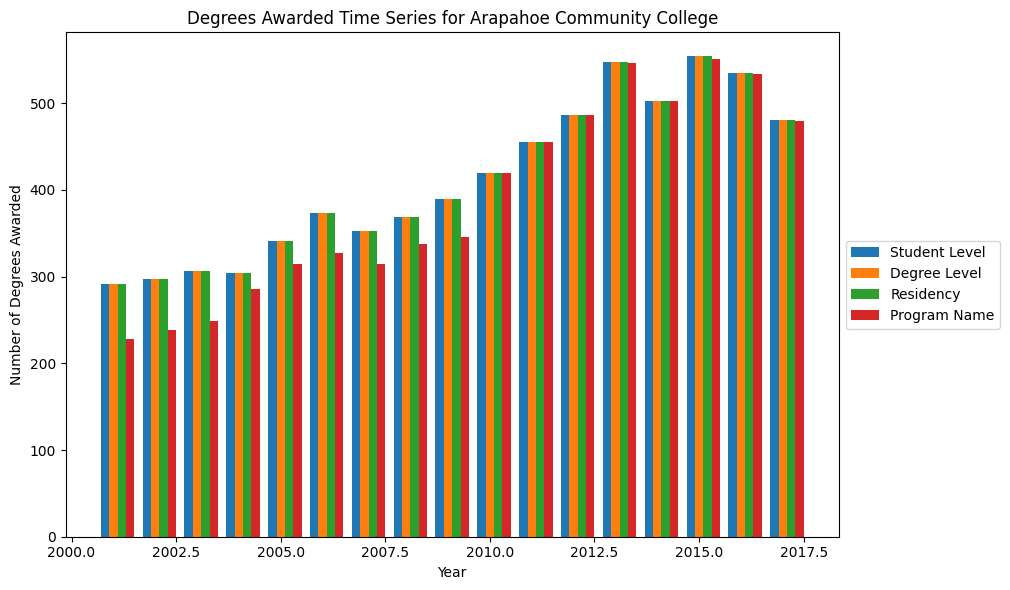

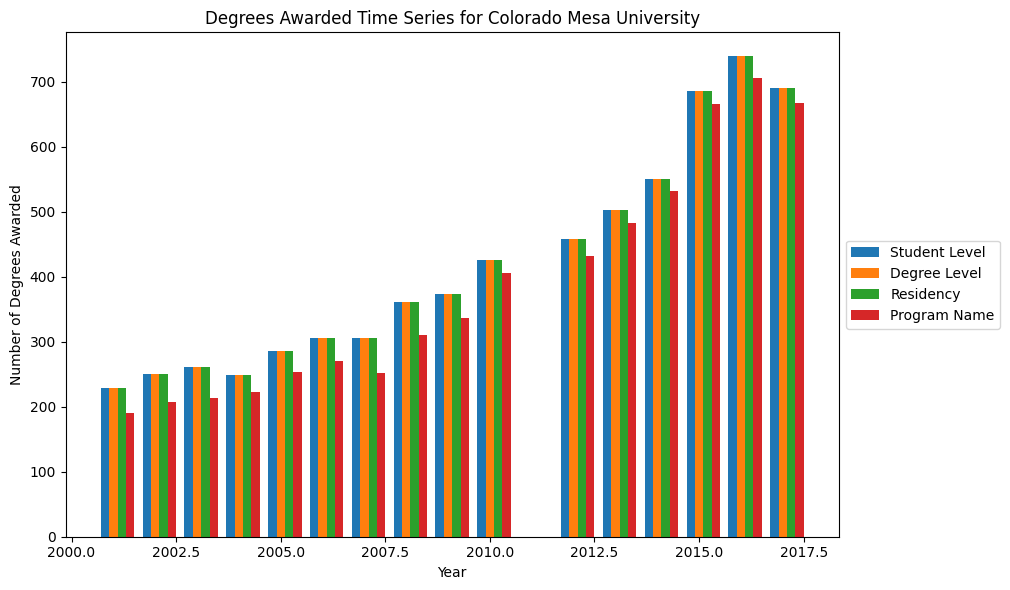

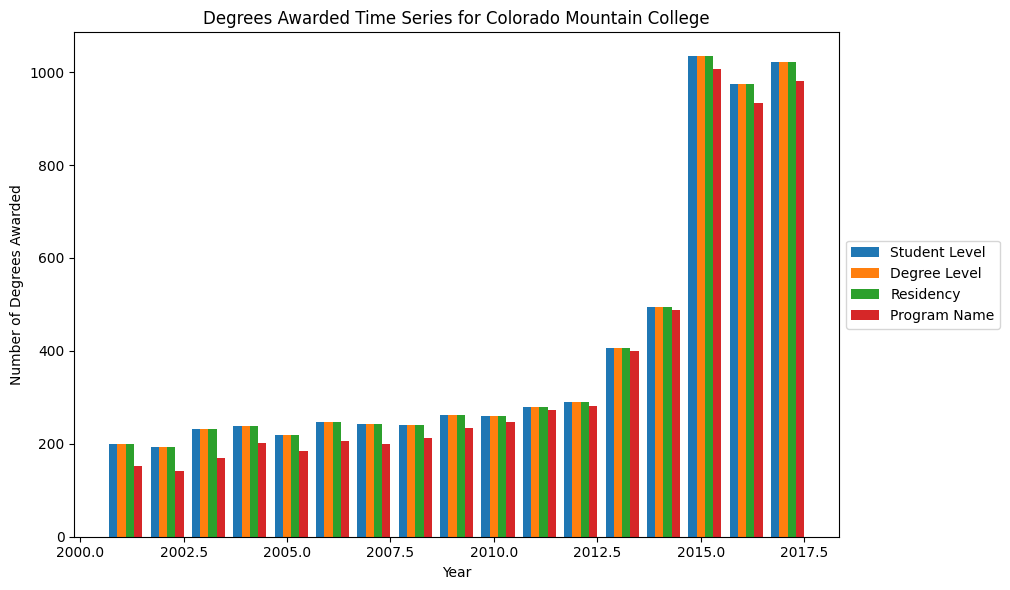

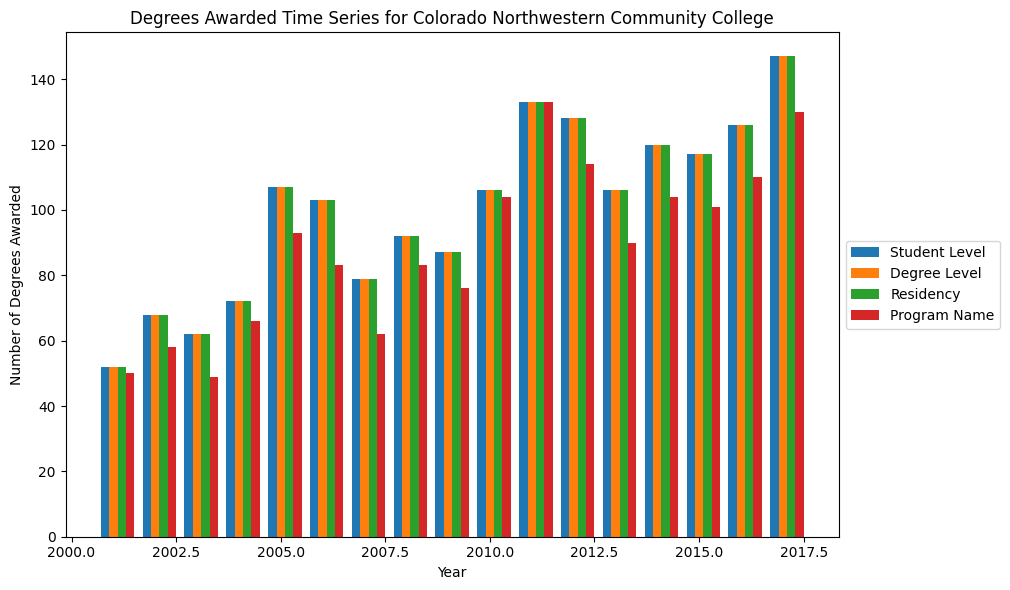

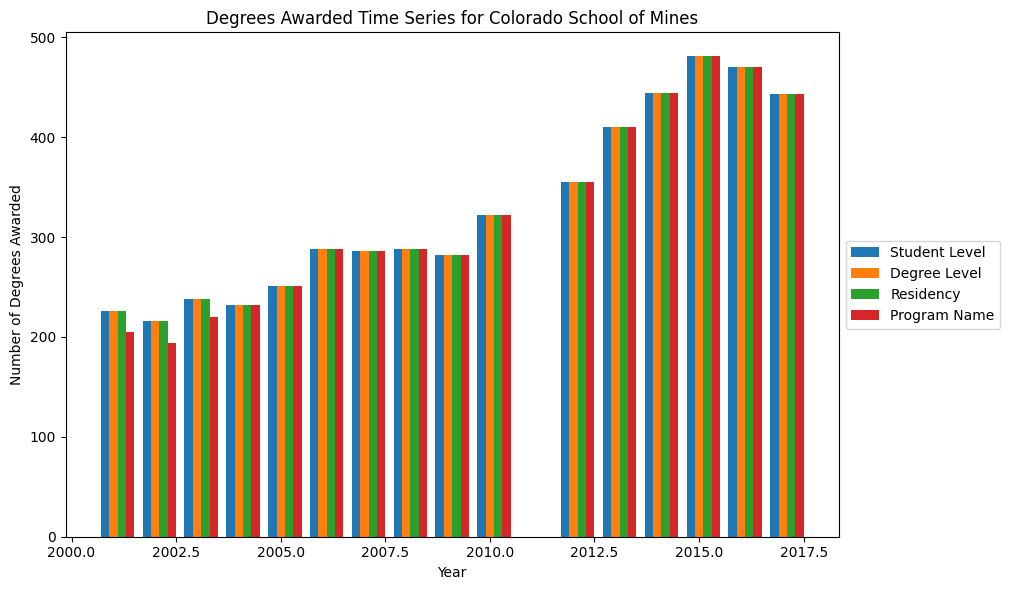

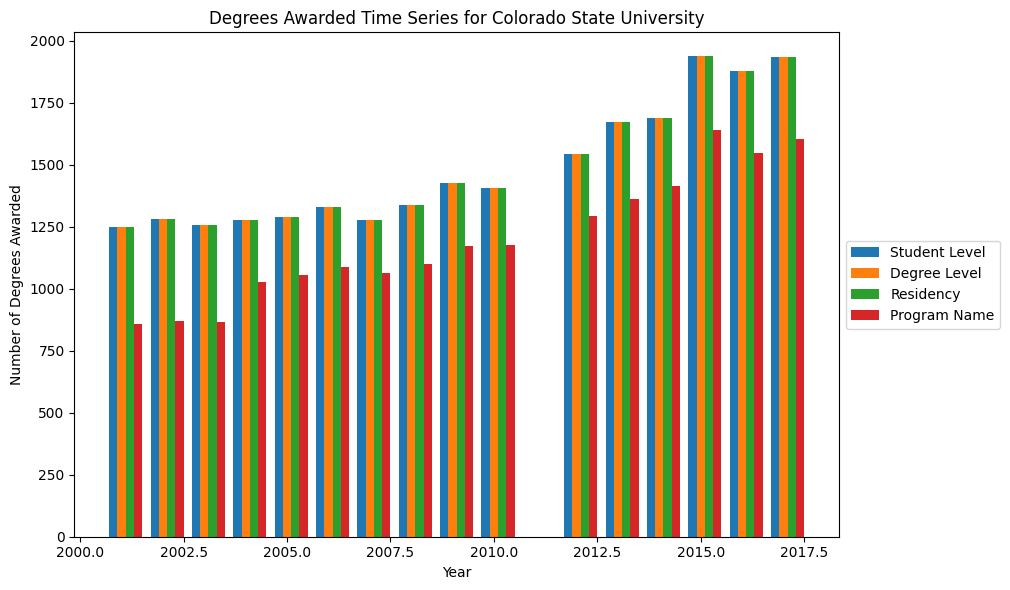

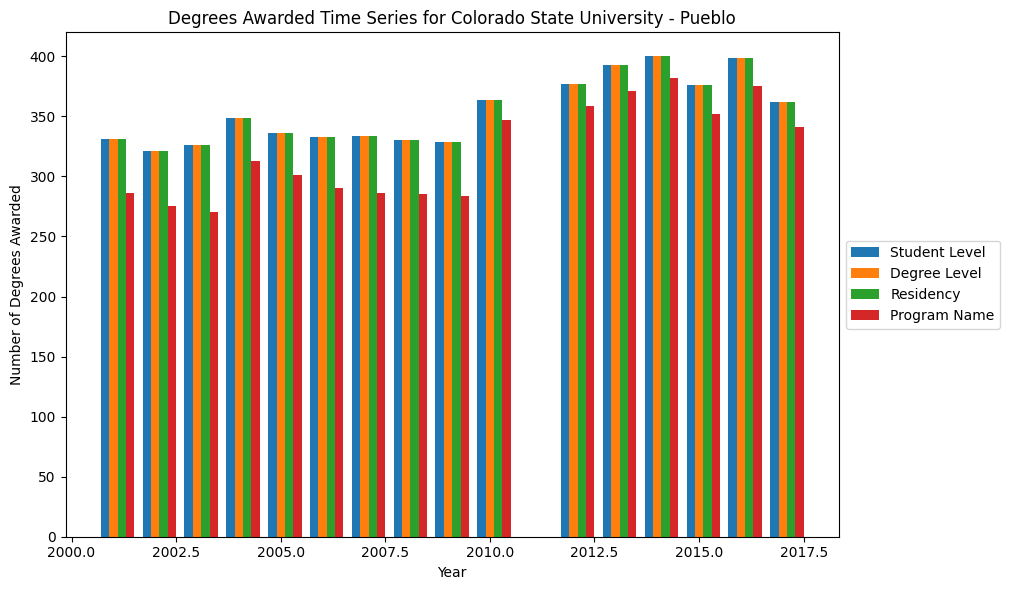

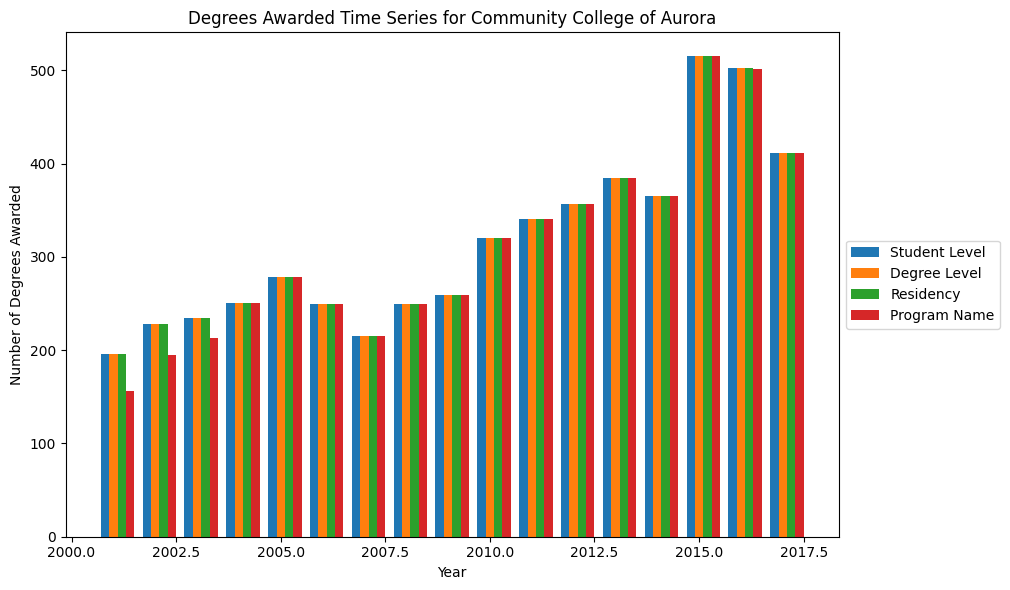

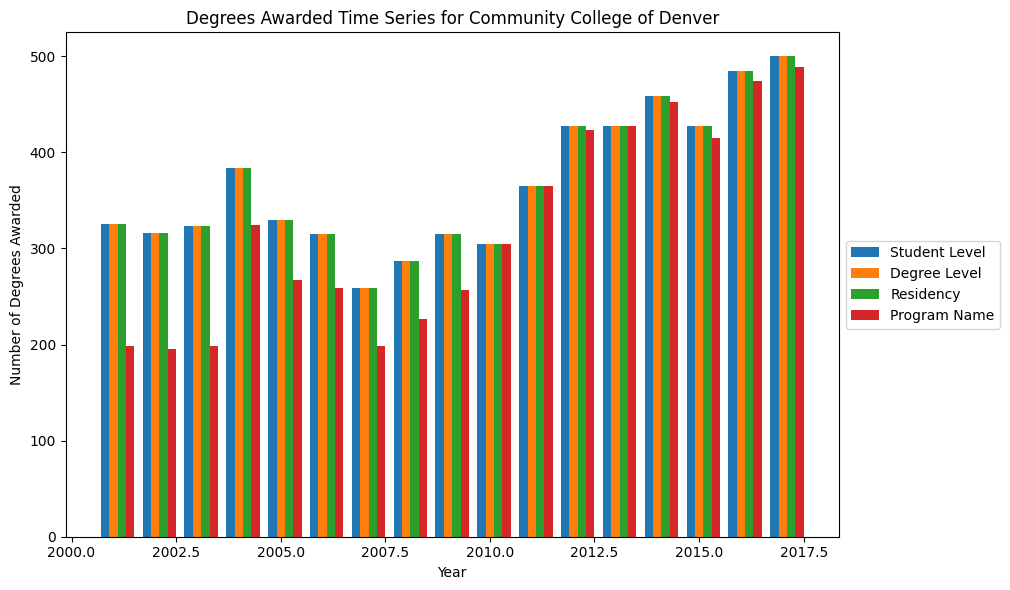

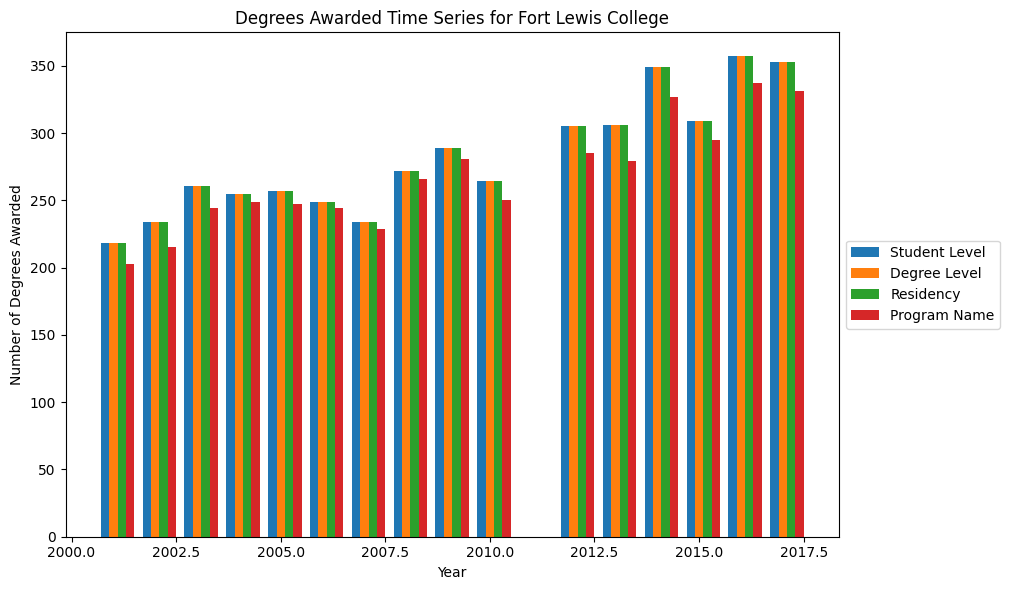

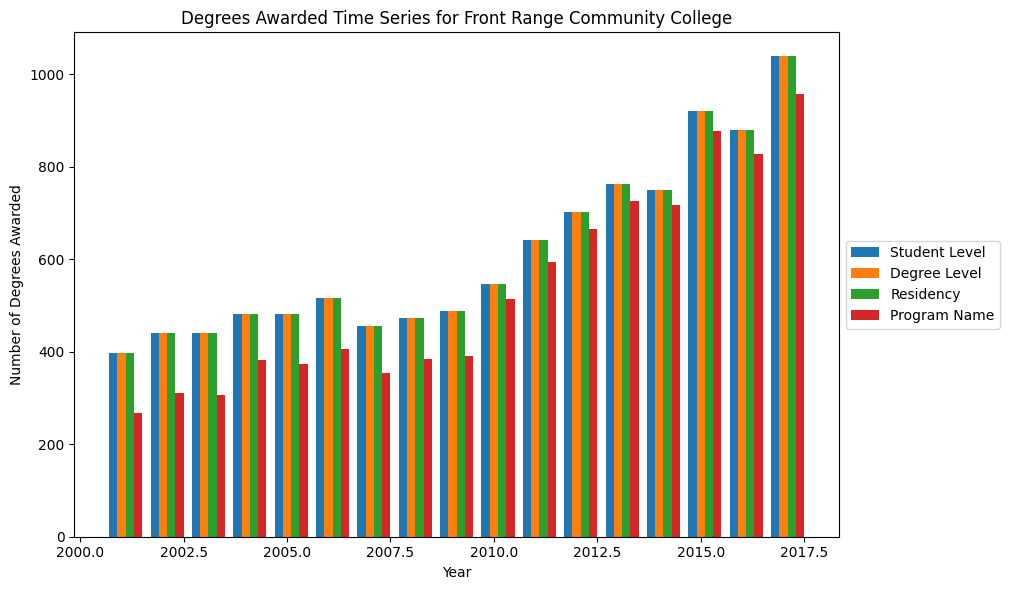

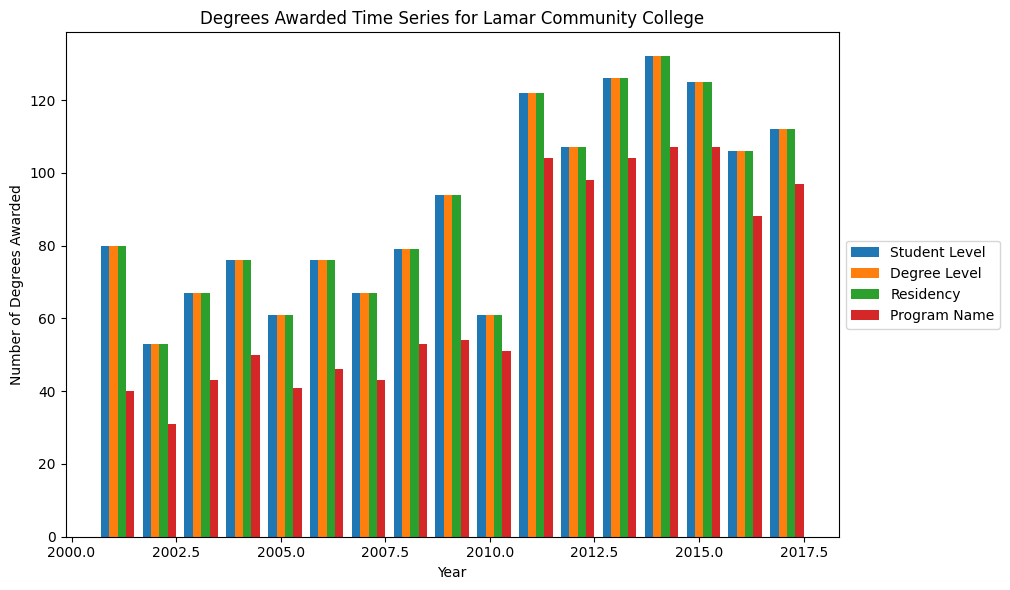

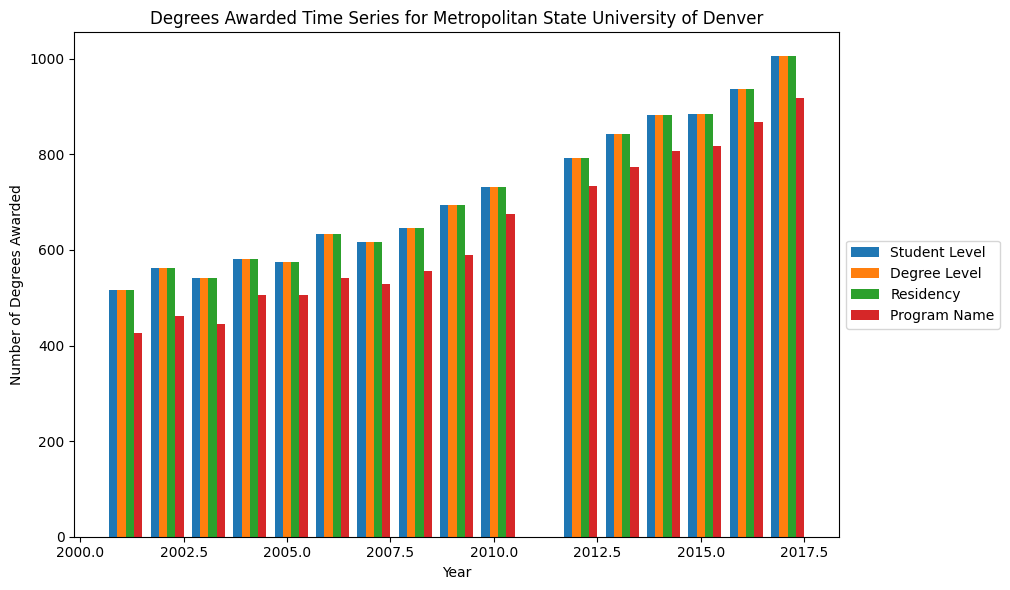

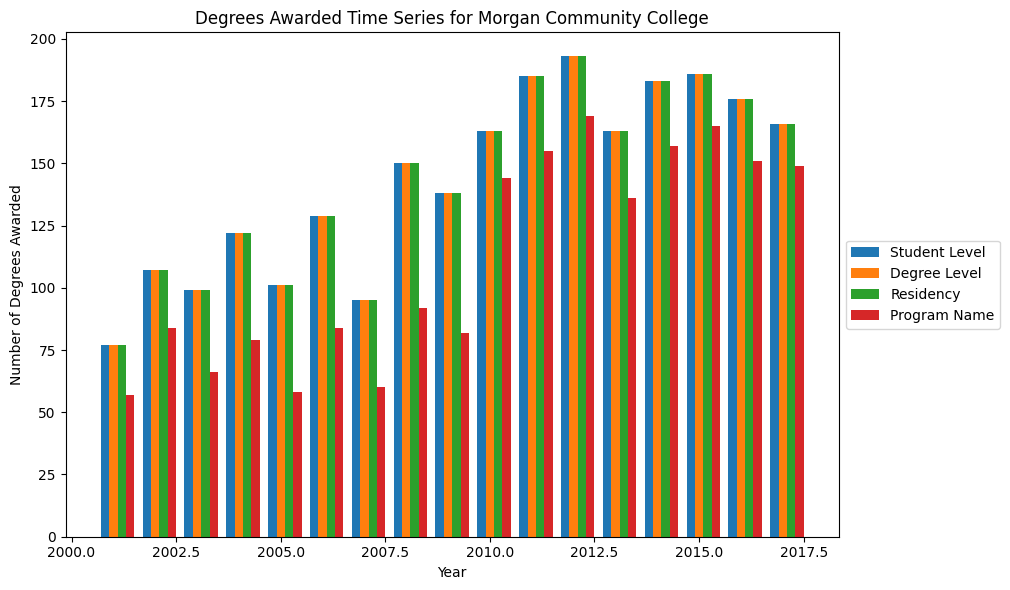

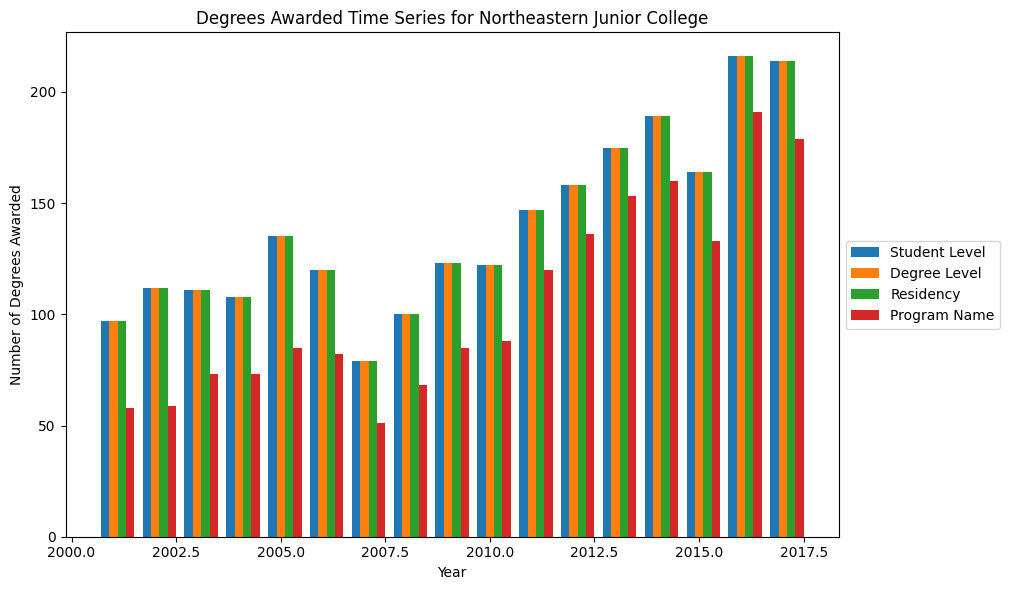

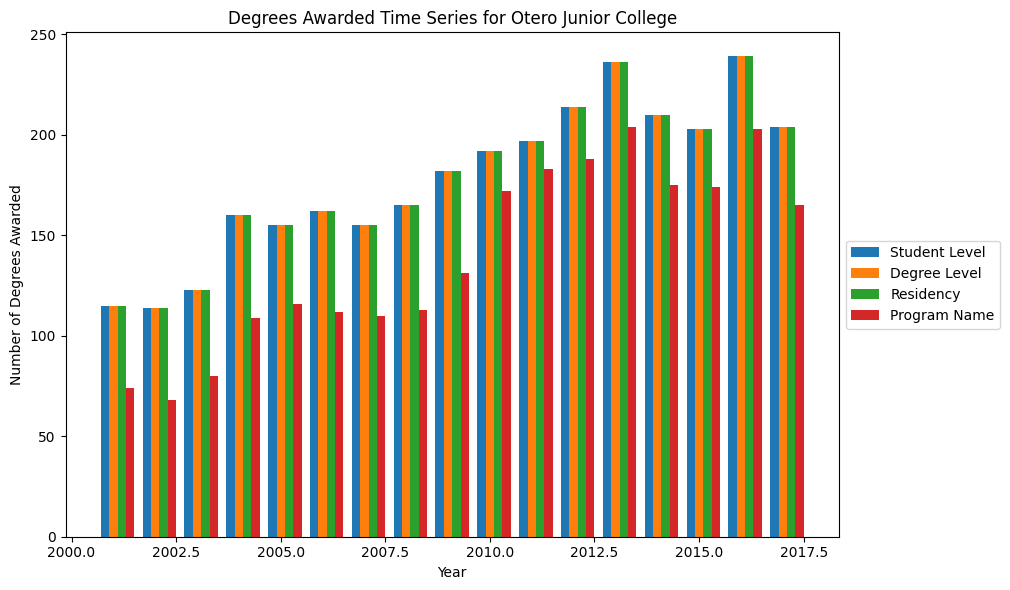

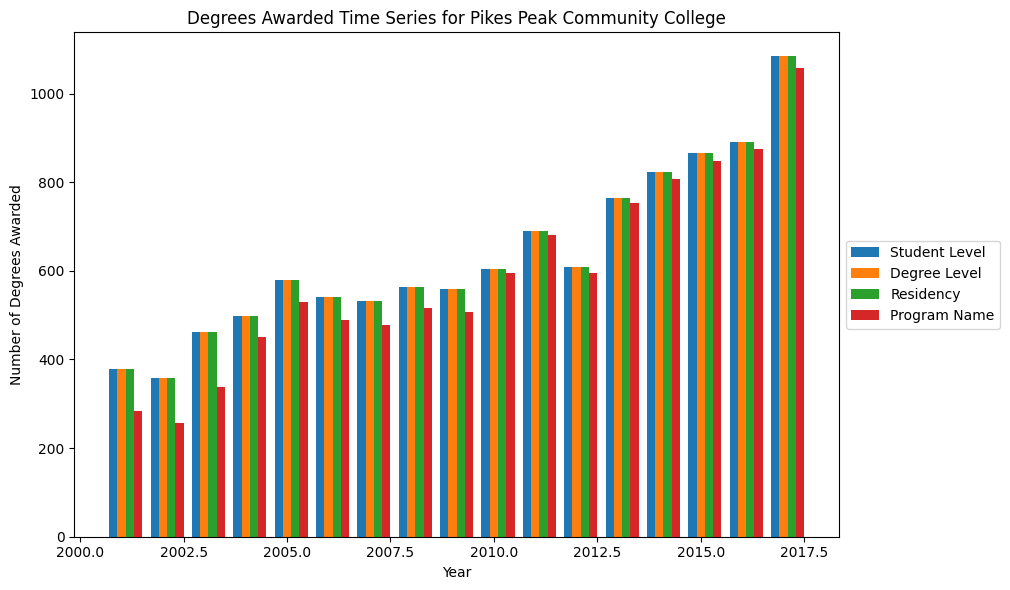

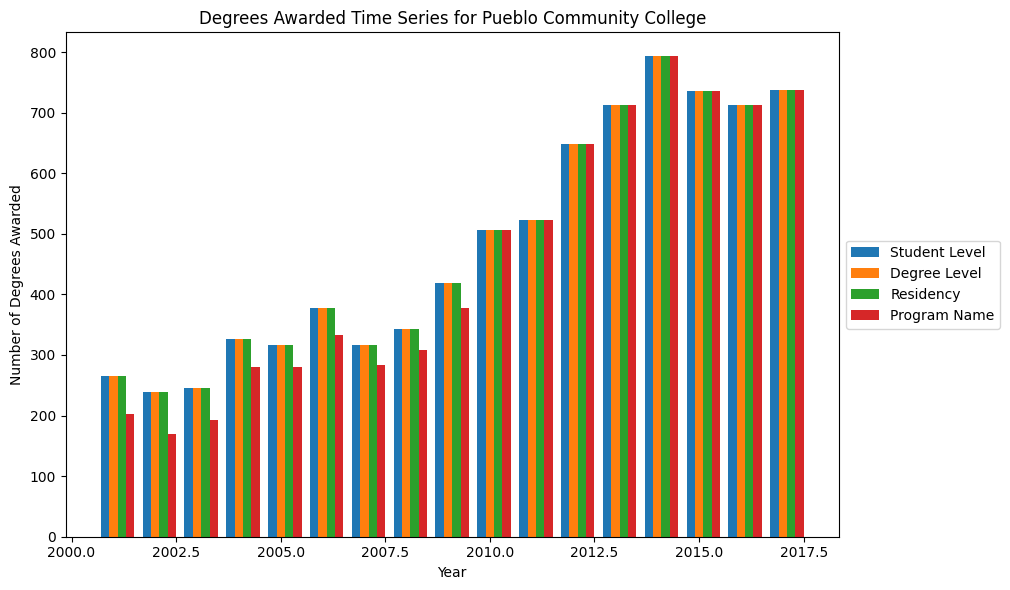

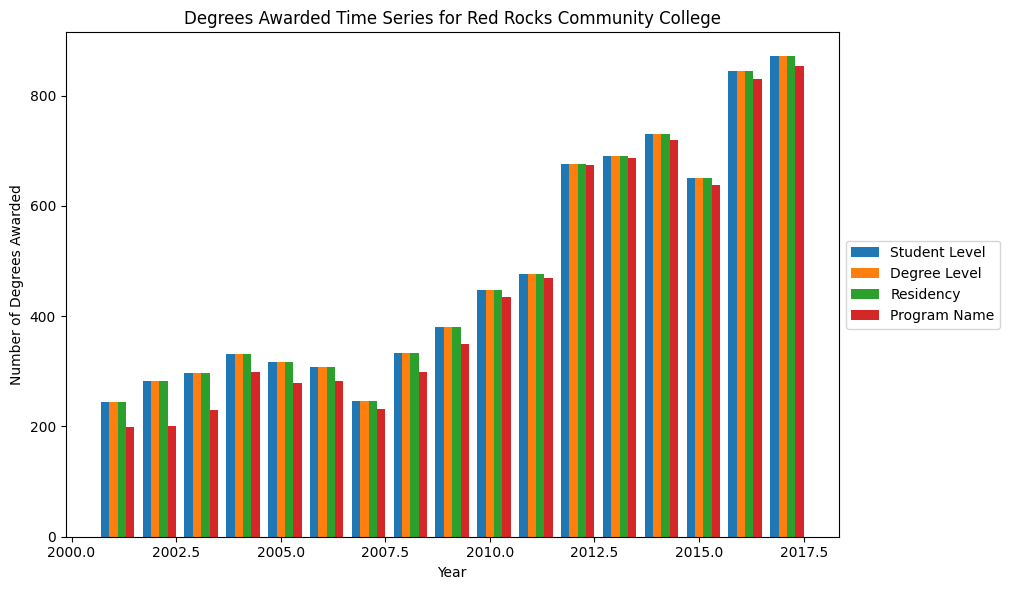

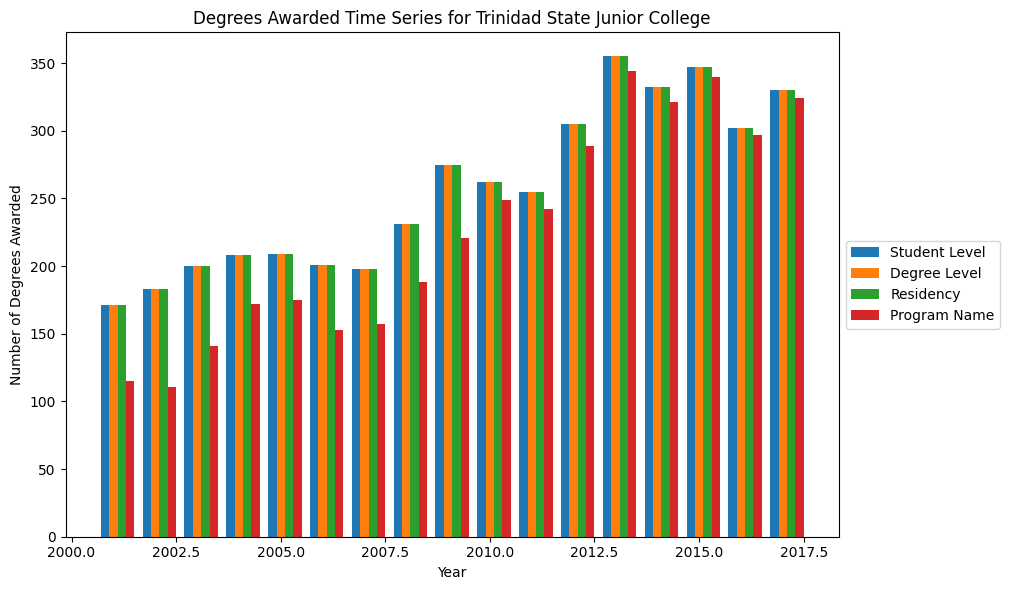

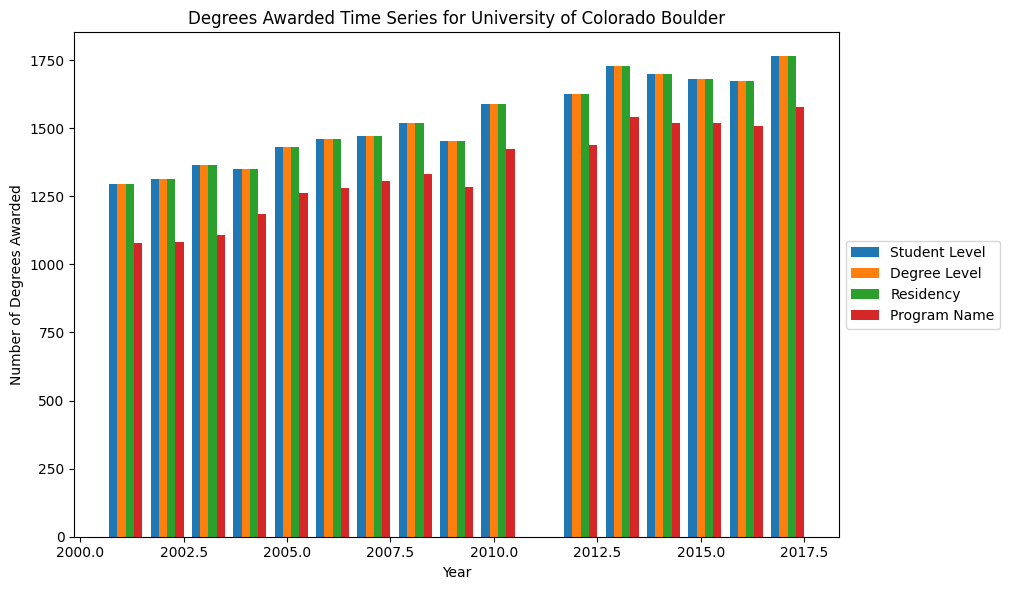

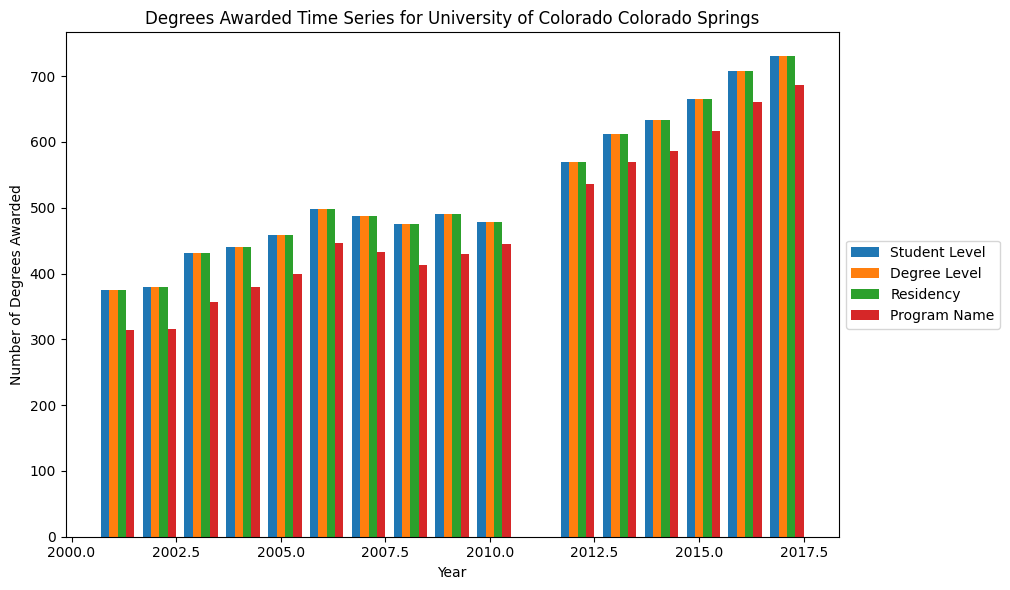

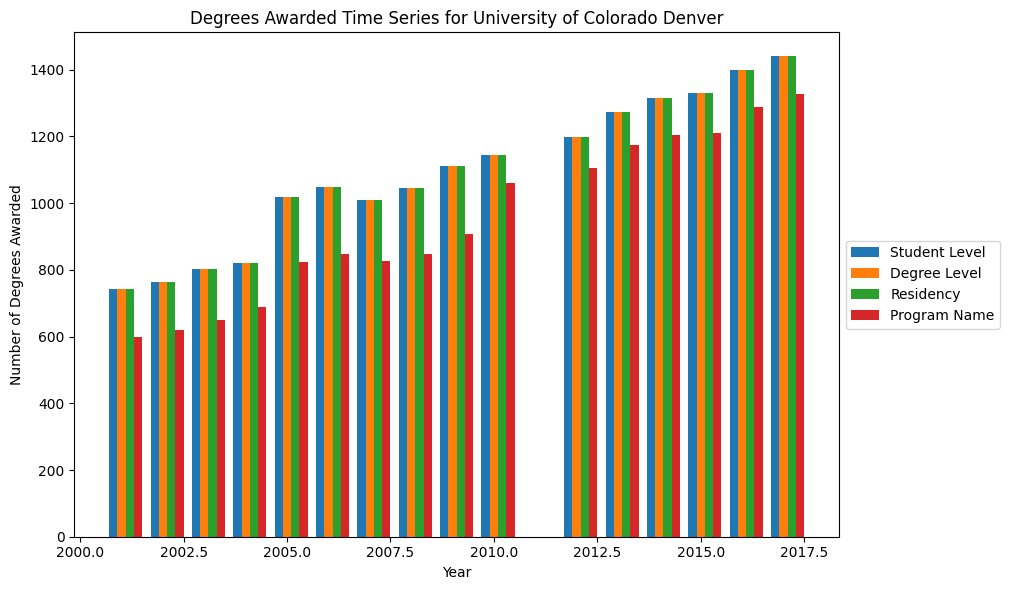

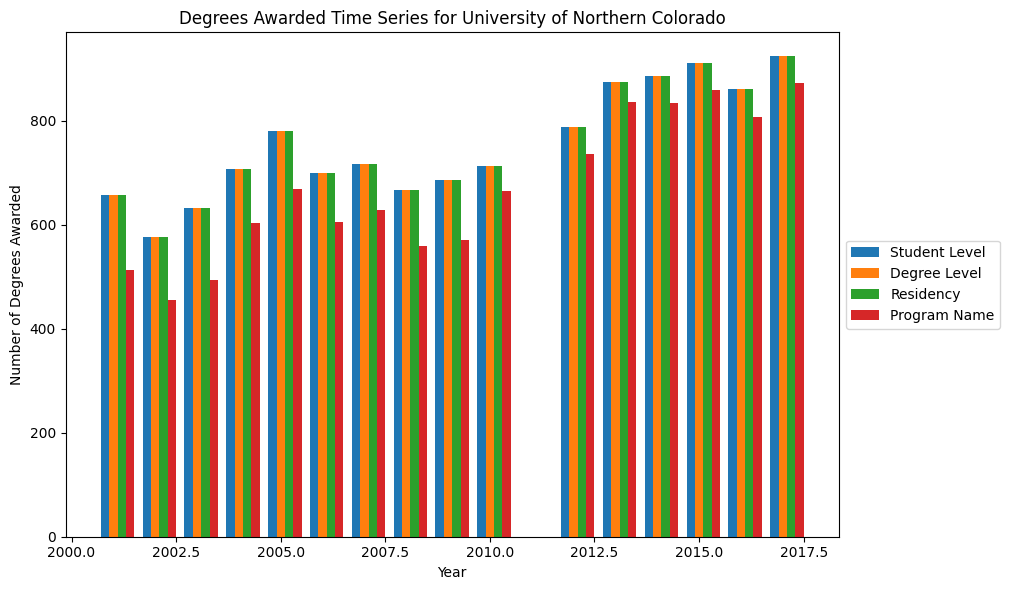

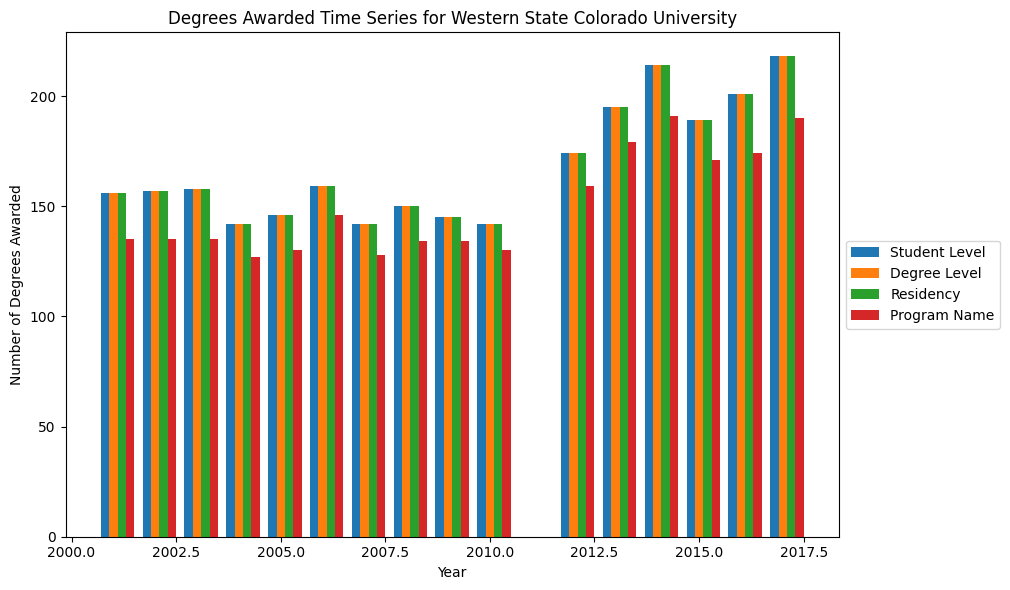

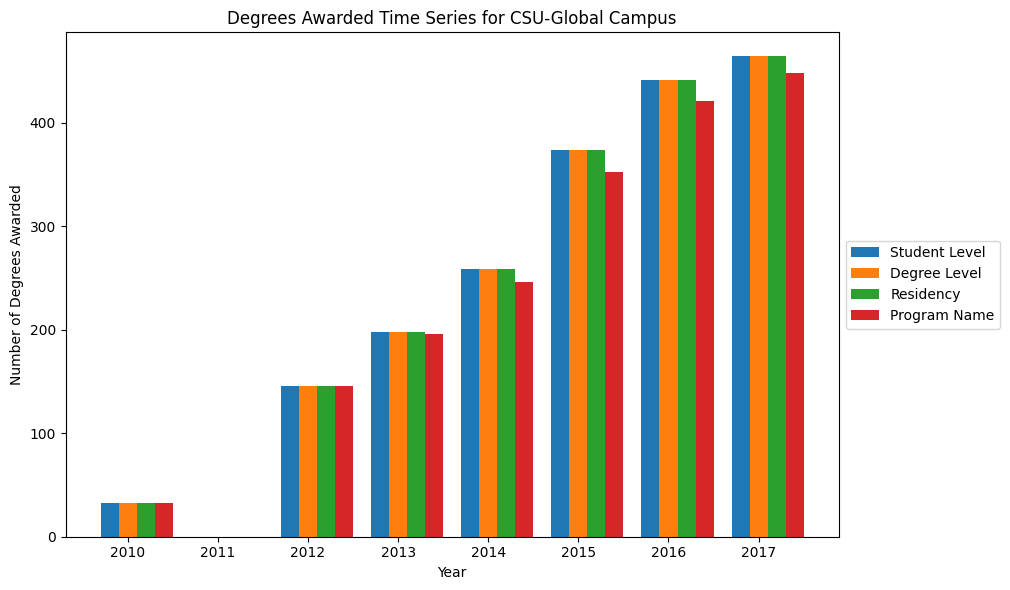

In [17]:
# Step 5: Create a time series graph for each institution
institutions = df_grouped['institutionName'].unique()

for institution in institutions:
    # Filter data for the specific institution
    institution_data = df_grouped[df_grouped['institutionName'] == institution]

    # Set up the plot
    plt.figure(figsize=(12, 6))
    
    # Plotting the counts
    plt.bar(institution_data['year'] - 0.2, institution_data['studentLevel_count'], width=0.2, label='Student Level', align='center')
    plt.bar(institution_data['year'], institution_data['degreeLevel_count'], width=0.2, label='Degree Level', align='center')
    plt.bar(institution_data['year'] + 0.2, institution_data['residency_count'], width=0.2, label='Residency', align='center')
    plt.bar(institution_data['year'] + 0.4, institution_data['programName_count'], width=0.2, label='Program Name', align='center')
    
    # Set title and labels
    plt.title(f"Degrees Awarded Time Series for {institution}")
    plt.xlabel('Year')
    plt.ylabel('Number of Degrees Awarded')
    
    # Adjust the legend to be outside the plot area (to the right)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Adjust the layout so the legend doesn't overlap with the plot
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    
    # Show the plot
    plt.show()

In [18]:
plt.savefig(f'{institution}_degree_awards.png')

<Figure size 640x480 with 0 Axes>